In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
from pathlib import Path

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
from os import read
df = pd.read_csv('https://raw.githubusercontent.com/Amanda-411/Data-Jurnal-JPPU-Agust-2025/1c591a2e4161db429607aa437b72f524851d578b/Data%20Komunitas%20Ikan%20Sungai%20Ogan%20Kecamatan%20Sungai%20Pinang.csv')

In [3]:
df.head()

,Timestamp,Waktu Sampling,Tim Peneliti,Stasiun Sampling,Desa,Latitude (Derajat Desimal),Longitude (Derajat Desimal),Jenis Alat Tangkap,Spesies Ikan,Famili Ikan,Jumlah Individu Tertangkap
0,23/07/2025 19:17,April s.d. Juli,"Allamanda Catharica, Siti Komariyah, Muhammad ...",Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Osteochilus schlegelii,NaN,5
1,23/07/2025 19:18,April s.d. Juli,"Allamanda Catharica, Siti Komariyah, Muhammad ...",Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Labiobarbus fasciatus,NaN,16
2,23/07/2025 19:19,April s.d. Juli,"Allamanda Catharica, Siti Komariyah, Muhammad ...",Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Oxygaster anomalura,NaN,21
3,23/07/2025 19:23,April s.d. Juli,"Allamanda Catharica, Siti Komariyah, Muhammad ...",Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Osteochilus vittatus,NaN,28
4,23/07/2025 19:29,April s.d. Juli,"Allamanda Catharica, Siti Komariyah, Muhammad ...",Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Rasbora cephalotaenia,NaN,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    93 non-null     object 
 1   Waktu Sampling               93 non-null     object 
 2   Tim Peneliti                 93 non-null     object 
 3   Stasiun Sampling             93 non-null     object 
 4   Desa                         93 non-null     object 
 5   Latitude (Derajat Desimal)   93 non-null     float64
 6   Longitude (Derajat Desimal)  93 non-null     float64
 7   Jenis Alat Tangkap           93 non-null     object 
 8   Spesies Ikan                 93 non-null     object 
 9   Famili Ikan                  0 non-null      float64
 10  Jumlah Individu Tertangkap   93 non-null     int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 8.1+ KB


In [5]:
# File klasifikasi Famili-Spesies-Nama Lokal
df_famili = pd.read_csv('https://raw.githubusercontent.com/Amanda-411/Data-Jurnal-JPPU-Agust-2025/1c591a2e4161db429607aa437b72f524851d578b/data_famili_baru.csv')


# EDA (Exploratory Data Analysis)

## 1. Handle missing values & duplicate

In [38]:
# Merger dua dataframe
df_lengkap = pd.merge(df, df_famili, on='Spesies Ikan', how='left', suffixes=('', '_klasifikasi'))

In [39]:
df_lengkap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    93 non-null     object 
 1   Waktu Sampling               93 non-null     object 
 2   Tim Peneliti                 93 non-null     object 
 3   Stasiun Sampling             93 non-null     object 
 4   Desa                         93 non-null     object 
 5   Latitude (Derajat Desimal)   93 non-null     float64
 6   Longitude (Derajat Desimal)  93 non-null     float64
 7   Jenis Alat Tangkap           93 non-null     object 
 8   Spesies Ikan                 93 non-null     object 
 9   Famili Ikan                  0 non-null      float64
 10  Jumlah Individu Tertangkap   93 non-null     int64  
 11  Famili Ikan_klasifikasi      93 non-null     object 
 12  Nama Lokal                   93 non-null     object 
dtypes: float64(3), int64(1

In [40]:
df_lengkap.head()

,Timestamp,Waktu Sampling,Tim Peneliti,Stasiun Sampling,Desa,Latitude (Derajat Desimal),Longitude (Derajat Desimal),Jenis Alat Tangkap,Spesies Ikan,Famili Ikan,Jumlah Individu Tertangkap,Famili Ikan_klasifikasi,Nama Lokal
0,23/07/2025 19:17,April s.d. Juli,"Allamanda Catharica, Siti Komariyah, Muhammad ...",Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Osteochilus schlegelii,NaN,5,Cyprinidae,Seberok
1,23/07/2025 19:18,April s.d. Juli,"Allamanda Catharica, Siti Komariyah, Muhammad ...",Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Labiobarbus fasciatus,NaN,16,Cyprinidae,Badas belang/Lambak
2,23/07/2025 19:19,April s.d. Juli,"Allamanda Catharica, Siti Komariyah, Muhammad ...",Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Oxygaster anomalura,NaN,21,Xenocyprididae,Terbul/Samis
3,23/07/2025 19:23,April s.d. Juli,"Allamanda Catharica, Siti Komariyah, Muhammad ...",Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Osteochilus vittatus,NaN,28,Cyprinidae,Seluang batu/Bowok
4,23/07/2025 19:29,April s.d. Juli,"Allamanda Catharica, Siti Komariyah, Muhammad ...",Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Rasbora cephalotaenia,NaN,5,Cyprinidae,Seluang belang/Seluang kureng


In [41]:
# Membuang kolom kosong/sama (identik)/ tidak perlu
df_lengkap = df_lengkap.drop(columns=["Timestamp", "Tim Peneliti", "Famili Ikan"], axis=1, errors='ignore')

In [42]:
df_lengkap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Waktu Sampling               93 non-null     object 
 1   Stasiun Sampling             93 non-null     object 
 2   Desa                         93 non-null     object 
 3   Latitude (Derajat Desimal)   93 non-null     float64
 4   Longitude (Derajat Desimal)  93 non-null     float64
 5   Jenis Alat Tangkap           93 non-null     object 
 6   Spesies Ikan                 93 non-null     object 
 7   Jumlah Individu Tertangkap   93 non-null     int64  
 8   Famili Ikan_klasifikasi      93 non-null     object 
 9   Nama Lokal                   93 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.4+ KB


In [43]:
# Mengubah nama kolom
df_lengkap.rename(columns={'Famili Ikan_klasifikasi': 'Famili',
    'Spesies Ikan': 'Spesies',
    'Latitude (Derajat Desimal)': 'Latitude',
    'Longitude (Derajat Desimal)': 'Longitude'}, inplace=True)
df_lengkap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Waktu Sampling              93 non-null     object 
 1   Stasiun Sampling            93 non-null     object 
 2   Desa                        93 non-null     object 
 3   Latitude                    93 non-null     float64
 4   Longitude                   93 non-null     float64
 5   Jenis Alat Tangkap          93 non-null     object 
 6   Spesies                     93 non-null     object 
 7   Jumlah Individu Tertangkap  93 non-null     int64  
 8   Famili                      93 non-null     object 
 9   Nama Lokal                  93 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.4+ KB


In [44]:
# Checking duplicate
df_lengkap[df_lengkap["Spesies"]=="Mystus nemurus"][["Spesies","Jumlah Individu Tertangkap"]]

,Spesies,Jumlah Individu Tertangkap
23,Mystus nemurus,1
24,Mystus nemurus,1
80,Mystus nemurus,2


In [45]:
# Membuang baris duplikat
df_lengkap.drop(index=[23], inplace=True)

In [46]:
df_lengkap[df_lengkap["Spesies"]=="Mystus nemurus"]

,Waktu Sampling,Stasiun Sampling,Desa,Latitude,Longitude,Jenis Alat Tangkap,Spesies,Jumlah Individu Tertangkap,Famili,Nama Lokal
24,April s.d. Juli,Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Jaring,Mystus nemurus,1,Bagridae,Patin kepala lebar/Baung
80,April s.d. Juli,Stasiun 3 (Penyadingan bagian Hilir),Penyandingan,-3.3315,104.77828,Tangkul,Mystus nemurus,2,Bagridae,Patin kepala lebar/Baung


In [47]:
# Memastikan semua nama spesies konsisten (huruf kecil dan tanpa spasi ekstra di awal/akhir)
df_lengkap['Spesies'] = df_lengkap['Spesies'].str.lower().str.strip()
print(df_lengkap['Spesies'].value_counts())

Spesies
oxygaster anomalura             5
labiobarbus fasciatus           4
rasbora tornieri                4
clupeoides borneensis           4
kryptopterus geminus            4
rasbora argyrotaenia            4
rasbora cephalotaenia           3
osteochilus vittatus            3
kryptopterus limpok             3
labiobarbus sabanus             3
ambassis kopsii                 3
osteochilus schlegelii          3
pangasius micronemus            2
anematichthys armatus           2
litopenaeus vannamei            2
cyclocheilichthys enoplos       2
mystus gulio                    2
hampala macrolepidota           2
anabas testudineus              2
barbonymus schwanenfeldii       2
kryptopterus micronema          2
mystus nemurus                  2
cyclocheilichthys heteronema    2
pseudeutropius moolenburghae    2
pangasius polyuranodon          2
rasbora aurotaenia              2
macrobrachium rosenbergii       2
rasbora wilpita                 1
mystus nigriceps                1
puntiu

In [48]:
# Kapitalisasi hanya huruf pertama dari seluruh string (genus)
df_lengkap['Spesies'] = df_lengkap['Spesies'].str.capitalize()
print(df_lengkap['Spesies'].value_counts())

Spesies
Oxygaster anomalura             5
Labiobarbus fasciatus           4
Rasbora tornieri                4
Clupeoides borneensis           4
Kryptopterus geminus            4
Rasbora argyrotaenia            4
Rasbora cephalotaenia           3
Osteochilus vittatus            3
Kryptopterus limpok             3
Labiobarbus sabanus             3
Ambassis kopsii                 3
Osteochilus schlegelii          3
Pangasius micronemus            2
Anematichthys armatus           2
Litopenaeus vannamei            2
Cyclocheilichthys enoplos       2
Mystus gulio                    2
Hampala macrolepidota           2
Anabas testudineus              2
Barbonymus schwanenfeldii       2
Kryptopterus micronema          2
Mystus nemurus                  2
Cyclocheilichthys heteronema    2
Pseudeutropius moolenburghae    2
Pangasius polyuranodon          2
Rasbora aurotaenia              2
Macrobrachium rosenbergii       2
Rasbora wilpita                 1
Mystus nigriceps                1
Puntiu

## 2. Descriptive Statistics

In [17]:
df_lengkap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 92
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Waktu Sampling              92 non-null     object 
 1   Stasiun Sampling            92 non-null     object 
 2   Desa                        92 non-null     object 
 3   Latitude                    92 non-null     float64
 4   Longitude                   92 non-null     float64
 5   Jenis Alat Tangkap          92 non-null     object 
 6   Spesies                     92 non-null     object 
 7   Jumlah Individu Tertangkap  92 non-null     int64  
 8   Famili                      92 non-null     object 
 9   Nama Lokal                  92 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.9+ KB


In [18]:
# Checking for missing values
df_lengkap.isna().sum()

,0
Waktu Sampling,0
Stasiun Sampling,0
Desa,0
Latitude,0
Longitude,0
Jenis Alat Tangkap,0
Spesies,0
Jumlah Individu Tertangkap,0
Famili,0
Nama Lokal,0


In [19]:
# Checking duplicate record
df_lengkap.duplicated().sum()

np.int64(0)

In [20]:
cats = ['Stasiun Sampling', 'Desa', 'Jenis Alat Tangkap', 'Spesies', 'Famili', 'Nama Lokal']
nums = ['Jumlah Individu Tertangkap', 'Latitude', 'Longitude']
df_lengkap[cats].describe()

,Stasiun Sampling,Desa,Jenis Alat Tangkap,Spesies,Famili,Nama Lokal
count,92,92,92,92,92,92
unique,3,2,5,46,20,46
top,Stasiun 1 (Sungai Pinang),Sungai Pinang,Serok,Oxygaster anomalura,Cyprinidae,Terbul/Samis
freq,53,53,27,5,42,5


In [21]:
df_lengkap[nums].describe()

,Jumlah Individu Tertangkap,Latitude,Longitude
count,92.000000,92.000000,92.000000
mean,17.456522,-3.344278,104.780624
std,57.083208,0.008674,0.002035
min,1.000000,-3.351500,104.778250
25%,1.000000,-3.351500,104.778280
50%,2.000000,-3.351500,104.782360
75%,8.000000,-3.337280,104.782360
max,398.000000,-3.331500,104.782360


In [22]:
df_lengkap.groupby('Spesies').agg({'Spesies':['count']}).head()

,Spesies
,count
Spesies,
Ambassis kopsii,3
Anabas testudineus,2
Anematichthys armatus,2
Barbonymus gonionotus,1
Barbonymus schwanenfeldii,2


In [23]:
df_lengkap.groupby('Jenis Alat Tangkap').agg({'Spesies':['count']}).head()

,Spesies
,count
Jenis Alat Tangkap,
Bubu,4
Jala,15
Jaring,20
Serok,27
Tangkul,26


In [24]:
df_lengkap.groupby('Stasiun Sampling').agg({'Spesies':['count']}).head()

,Spesies
,count
Stasiun Sampling,
Stasiun 1 (Sungai Pinang),53
Stasiun 2 (Penyandingan),20
Stasiun 3 (Penyadingan bagian Hilir),19


In [25]:
df_lengkap.groupby('Stasiun Sampling').agg({'Spesies':['nunique']}).head()

,Spesies
,nunique
Stasiun Sampling,
Stasiun 1 (Sungai Pinang),41
Stasiun 2 (Penyandingan),20
Stasiun 3 (Penyadingan bagian Hilir),15


In [26]:
df_lengkap.groupby('Stasiun Sampling').agg({'Jenis Alat Tangkap':['nunique']}).head()

,Jenis Alat Tangkap
,nunique
Stasiun Sampling,
Stasiun 1 (Sungai Pinang),4
Stasiun 2 (Penyandingan),1
Stasiun 3 (Penyadingan bagian Hilir),2


### Calculate Diversity Indices

In [27]:
# Menghitung indeks
def calculate_diversity_indices(group_df):
    total_individuals = group_df['Jumlah Individu Tertangkap'].sum()
    species_counts = group_df.groupby('Spesies')['Jumlah Individu Tertangkap'].sum()

    # Indeks Keanekaragaman (Shannon-Wiener - H')
    # H' = -sum(Pi * ln(Pi))
    Pi = species_counts / total_individuals
    shannon_wiener = -np.sum(Pi * np.log(Pi.replace(0, np.nan).dropna())) # handle log(0)

    # Indeks Kemerataan (Evenness - Pielou's J)
    # J = H' / ln(S)
    S = len(species_counts) # Jumlah spesies unik
    if S > 1: # Avoid log(1) which is 0
        evenness = shannon_wiener / np.log(S)
    else:
        evenness = np.nan # Or 0, depending on definition for S=1

    # Indeks Dominansi (Simpson - D)
    # D = sum((ni/N)^2)
    # Atau 1 - D_simpson (untuk interpretasi keanekaragaman)
    simpson_D = np.sum((species_counts / total_individuals)**2)

    return pd.Series({
        'Shannon_Wiener': shannon_wiener,
        'Evenness': evenness,
        'Simpson_Dominance': simpson_D
    })

In [28]:
# Perhitungan per Stasiun Sampling
diversity_results_per_station = df_lengkap.groupby('Stasiun Sampling').apply(calculate_diversity_indices)
print("\nIndeks Keanekaragaman per Stasiun Sampling:")
display(diversity_results_per_station)

# per Desa:
diversity_results_per_desa = df_lengkap.groupby('Desa').apply(calculate_diversity_indices)
print("\nIndeks Keanekaragaman per Desa:")
display(diversity_results_per_desa)

# Keseluruhan:
diversity_overall = calculate_diversity_indices(df_lengkap)
print("\nIndeks Keanekaragaman Keseluruhan:")
display(diversity_overall)


Indeks Keanekaragaman per Stasiun Sampling:


/tmp/ipython-input-28-2301270543.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity_results_per_station = df_lengkap.groupby('Stasiun Sampling').apply(calculate_diversity_indices)


,Shannon_Wiener,Evenness,Simpson_Dominance
Stasiun Sampling,,,
Stasiun 1 (Sungai Pinang),2.870806,0.773058,0.088228
Stasiun 2 (Penyandingan),1.362296,0.454746,0.461983
Stasiun 3 (Penyadingan bagian Hilir),0.941292,0.347590,0.557317



Indeks Keanekaragaman per Desa:


/tmp/ipython-input-28-2301270543.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity_results_per_desa = df_lengkap.groupby('Desa').apply(calculate_diversity_indices)


,Shannon_Wiener,Evenness,Simpson_Dominance
Desa,,,
Penyandingan,1.263952,0.392669,0.499648
Sungai Pinang,2.870806,0.773058,0.088228



Indeks Keanekaragaman Keseluruhan:


,0
Shannon_Wiener,1.841498
Evenness,0.480980
Simpson_Dominance,0.347535


In [29]:
print(diversity_results_per_station.describe())

       Shannon_Wiener  Evenness  Simpson_Dominance
count        3.000000  3.000000           3.000000
mean         1.724798  0.525131           0.369176
std          1.014550  0.221295           0.247933
min          0.941292  0.347590           0.088228
25%          1.151794  0.401168           0.275106
50%          1.362296  0.454746           0.461983
75%          2.116551  0.613902           0.509650
max          2.870806  0.773058           0.557317


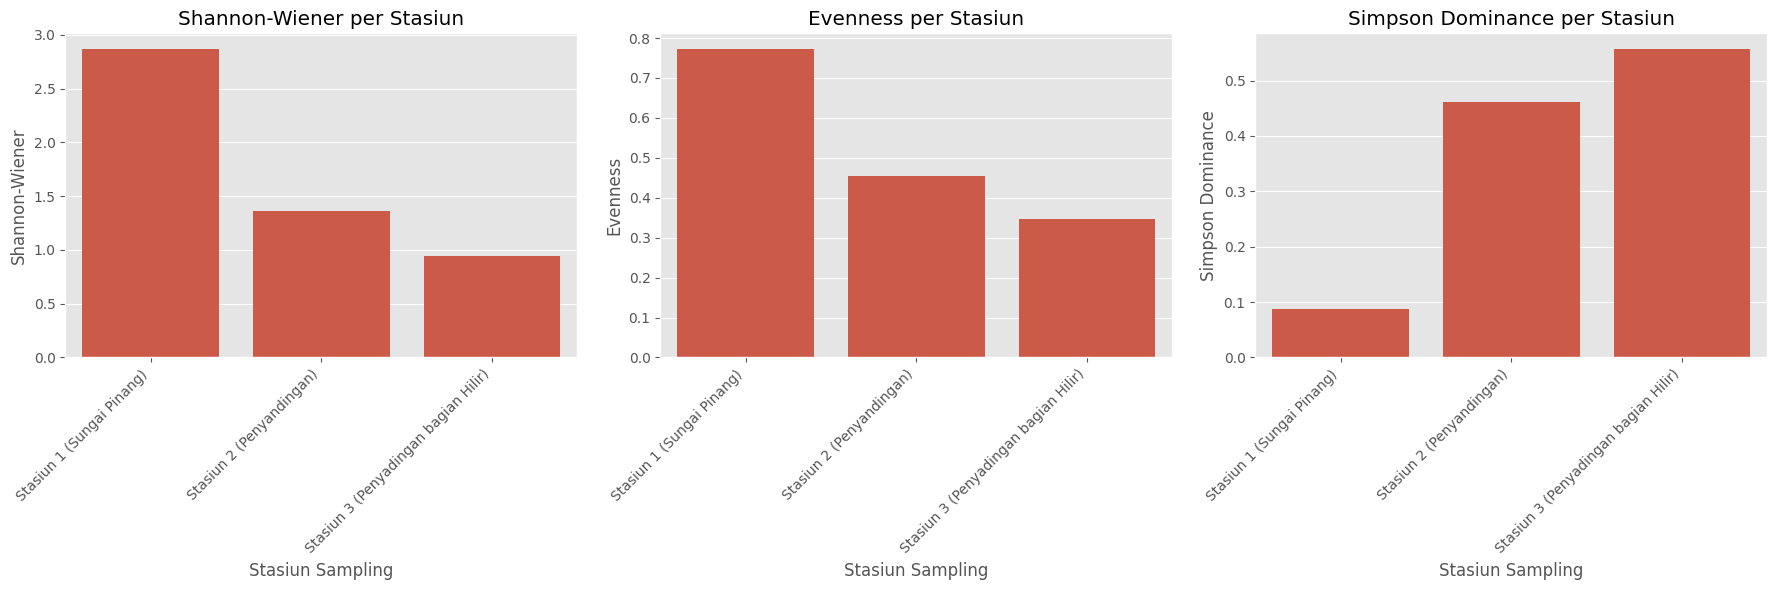

In [30]:
# Visualisasikan Distribusi
plt.figure(figsize=(18, 6))

# Plot untuk Shannon-Wiener
plt.subplot(1, 3, 1)
sns.barplot(x=diversity_results_per_station.index, y='Shannon_Wiener', data=diversity_results_per_station)
plt.title('Shannon-Wiener per Stasiun')
plt.xlabel('Stasiun Sampling')
plt.ylabel('Shannon-Wiener')
plt.xticks(rotation=45, ha='right') # Memutar label x agar tidak tumpang tindih

# Plot untuk Evenness
plt.subplot(1, 3, 2)
sns.barplot(x=diversity_results_per_station.index, y='Evenness', data=diversity_results_per_station)
plt.title('Evenness per Stasiun')
plt.xlabel('Stasiun Sampling')
plt.ylabel('Evenness')
plt.xticks(rotation=45, ha='right')

# Plot untuk Simpson Dominance
plt.subplot(1, 3, 3)
sns.barplot(x=diversity_results_per_station.index, y='Simpson_Dominance', data=diversity_results_per_station)
plt.title('Simpson Dominance per Stasiun')
plt.xlabel('Stasiun Sampling')
plt.ylabel('Simpson Dominance')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

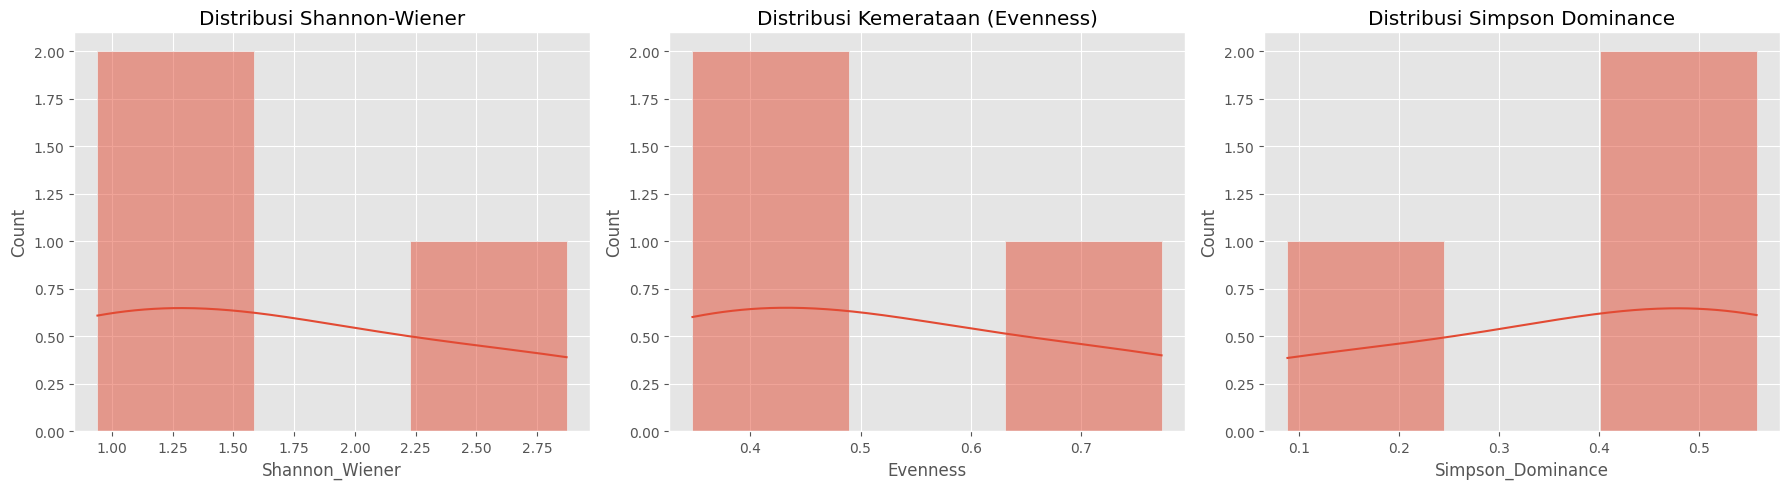

In [31]:
# Visualisasikan Distribusi
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(diversity_results_per_station['Shannon_Wiener'], kde=True, ax=axes[0])
axes[0].set_title('Distribusi Shannon-Wiener')

sns.histplot(diversity_results_per_station['Evenness'], kde=True, ax=axes[1])
axes[1].set_title('Distribusi Kemerataan (Evenness)')

sns.histplot(diversity_results_per_station['Simpson_Dominance'], kde=True, ax=axes[2])
axes[2].set_title('Distribusi Simpson Dominance')

plt.tight_layout()
plt.show()

In [32]:
# Stasiun dengan keanekaragaman tertinggi (Shannon-Wiener)
print("Stasiun dengan keanekaragaman tertinggi (Shannon-Wiener):")
print(diversity_results_per_station.sort_values(by='Shannon_Wiener', ascending=False).head())
print("="*100)

# Stasiun dengan dominansi tertinggi (Simpson Dominance)
# Nilai Simpson Dominance yang LEBIH TINGGI berarti keanekaragaman LEBIH RENDAH (dominansi tinggi)
print("\nStasiun dengan dominansi tertinggi (Simpson Dominance):")
print(diversity_results_per_station.sort_values(by='Simpson_Dominance', ascending=False).head())
print("="*100)

# Stasiun dengan kemerataan tertinggi (Evenness)
# Nilai Evenness yang LEBIH TINGGI berarti kemerataan LEBIH BAIK
print("\nStasiun dengan kemerataan tertinggi (Evenness):")
print(diversity_results_per_station.sort_values(by='Evenness', ascending=False).head())
print("="*100)

# Stasiun dengan kemerataan terendah (Evenness)
# Nilai Evenness yang LEBIH RENDAH berarti kemerataan LEBIH BURUK
print("\nStasiun dengan kemerataan terendah (Evenness):")
print(diversity_results_per_station.sort_values(by='Evenness', ascending=True).head())

Stasiun dengan keanekaragaman tertinggi (Shannon-Wiener):
                                      Shannon_Wiener  Evenness  \
Stasiun Sampling                                                 
Stasiun 1 (Sungai Pinang)                   2.870806  0.773058   
Stasiun 2 (Penyandingan)                    1.362296  0.454746   
Stasiun 3 (Penyadingan bagian Hilir)        0.941292  0.347590   

                                      Simpson_Dominance  
Stasiun Sampling                                         
Stasiun 1 (Sungai Pinang)                      0.088228  
Stasiun 2 (Penyandingan)                       0.461983  
Stasiun 3 (Penyadingan bagian Hilir)           0.557317  

Stasiun dengan dominansi tertinggi (Simpson Dominance):
                                      Shannon_Wiener  Evenness  \
Stasiun Sampling                                                 
Stasiun 3 (Penyadingan bagian Hilir)        0.941292  0.347590   
Stasiun 2 (Penyandingan)                    1.362296  0.454746   


## 3. Univariate Analysis

### Categorical Data

In [33]:
categoricals = ['Stasiun Sampling', 'Desa', 'Jenis Alat Tangkap', 'Spesies', 'Famili', 'Nama Lokal']

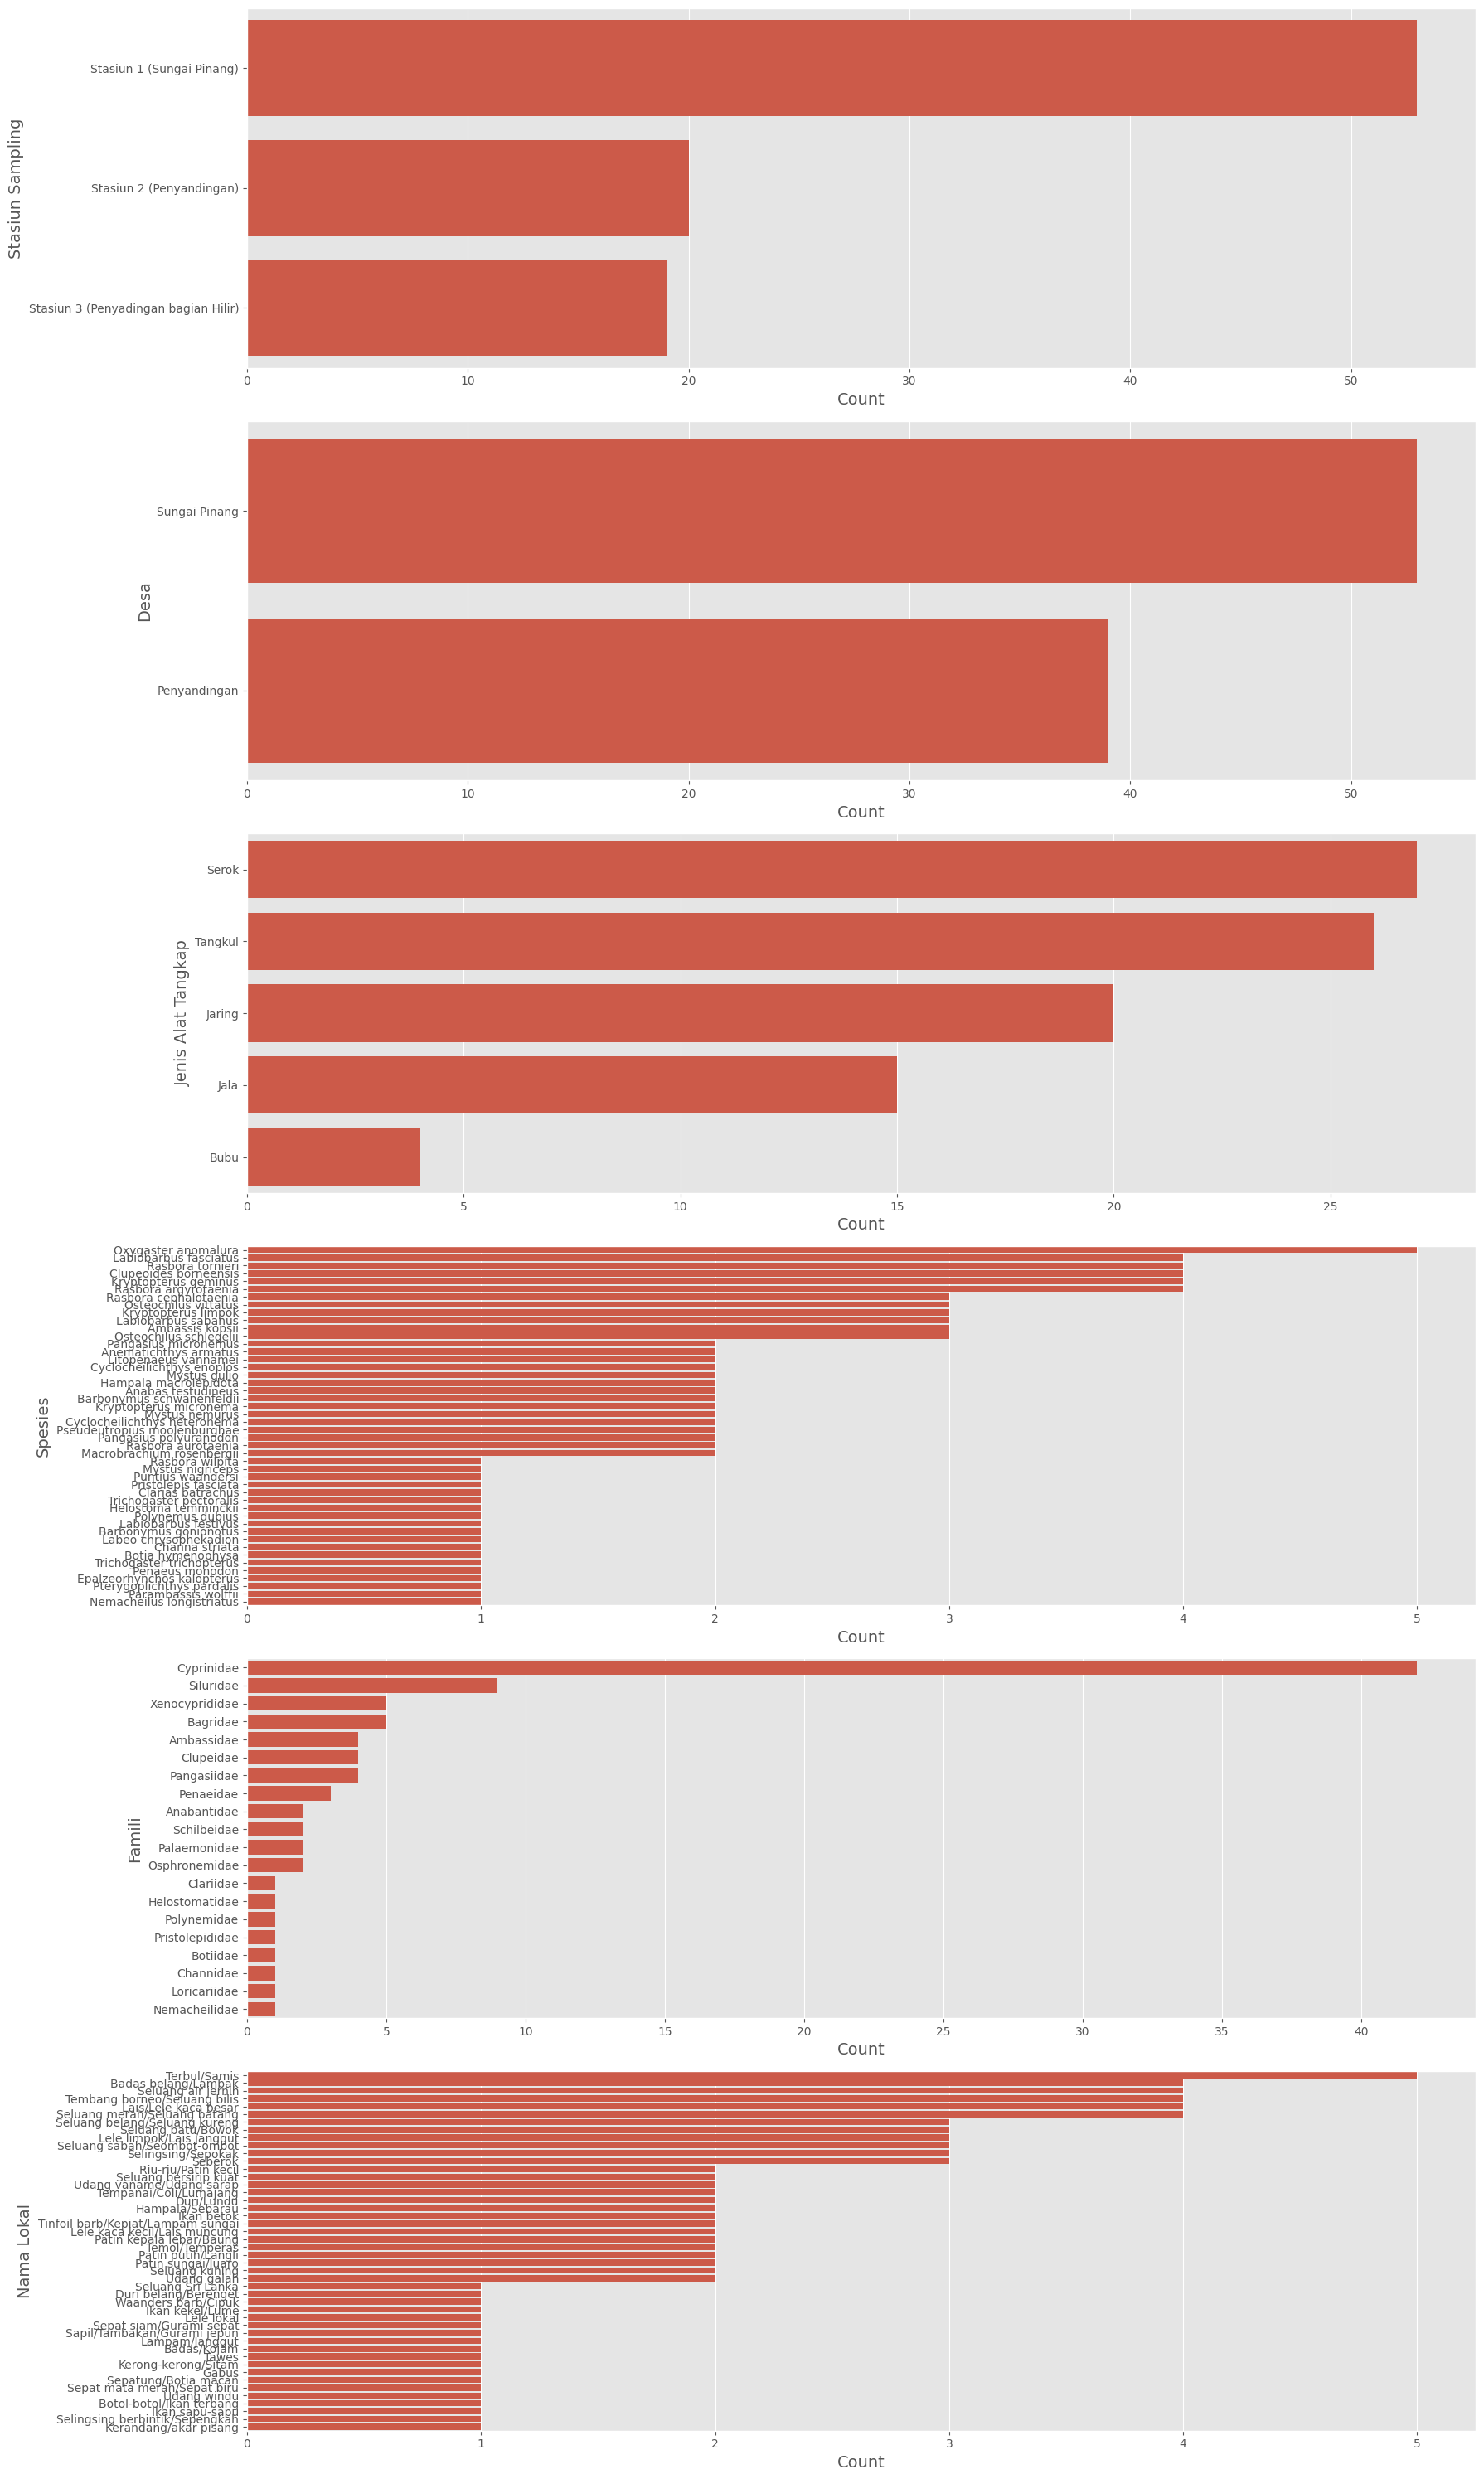

In [34]:
plt.figure(figsize=(18, len(cats) * 5)) # Adjust figure size based on number of categories
for idx, col in enumerate(cats):
    plt.subplot(len(cats), 1, idx + 1)
    sns.countplot(data = df_lengkap, y = col, order = df_lengkap[col].value_counts().index)
    plt.ylabel(col, fontsize = 14)
    plt.xlabel("Count", fontsize = 14)
    plt.tight_layout()

plt.show()

### Numerical Data

#### Jumlah Individu Tertangkap

In [35]:
Q1_Jumlah_Individu_Tertangkap = np.quantile(df_lengkap['Jumlah Individu Tertangkap'], .25)
Q3_Jumlah_Individu_Tertangkap = np.quantile(df_lengkap['Jumlah Individu Tertangkap'], .75)
IQR_Jumlah_Individu_Tertangkap = Q3_Jumlah_Individu_Tertangkap - Q1_Jumlah_Individu_Tertangkap
min_IQR_age = Q1_Jumlah_Individu_Tertangkap - 1.5 * IQR_Jumlah_Individu_Tertangkap
max_IQR_age = Q3_Jumlah_Individu_Tertangkap + 1.5 * IQR_Jumlah_Individu_Tertangkap
nilai_min_Jumlah_Individu_Tertangkap = np.min(df_lengkap['Jumlah Individu Tertangkap'])
nilai_max_Jumlah_Individu_Tertangkap = np.max(df_lengkap['Jumlah Individu Tertangkap'])

print('')
print('A. Mencari outlier dari kolom Jumlah Individu Tertangkap')
print('1. nilai Q1 dari Jumlah Individu Tertangkap =', Q1_Jumlah_Individu_Tertangkap)
print('2. nilai Q3 dari Jumlah Individu Tertangkap =', Q3_Jumlah_Individu_Tertangkap)
print('3. nilai IQR dari Jumlah Individu Tertangkap =', IQR_Jumlah_Individu_Tertangkap)
print('4. nilai min IQR dari Jumlah Individu Tertangkap =', min_IQR_age)
print('5. nilai max IQR dari Jumlah Individu Tertangkap =', max_IQR_age)
print('6. nilai min dari Jumlah Individu Tertangkap =', nilai_min_Jumlah_Individu_Tertangkap)
print('7. nilai max dari Jumlah Individu Tertangkap =', nilai_max_Jumlah_Individu_Tertangkap)

if (nilai_min_Jumlah_Individu_Tertangkap < min_IQR_age):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')

if (nilai_max_Jumlah_Individu_Tertangkap > max_IQR_age):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


A. Mencari outlier dari kolom Jumlah Individu Tertangkap
1. nilai Q1 dari Jumlah Individu Tertangkap = 1.0
2. nilai Q3 dari Jumlah Individu Tertangkap = 8.0
3. nilai IQR dari Jumlah Individu Tertangkap = 7.0
4. nilai min IQR dari Jumlah Individu Tertangkap = -9.5
5. nilai max IQR dari Jumlah Individu Tertangkap = 18.5
6. nilai min dari Jumlah Individu Tertangkap = 1
7. nilai max dari Jumlah Individu Tertangkap = 398
Tidak ditemukan low outlier!
Ditemukan high outlier!


<Axes: ylabel='Jumlah Individu Tertangkap'>

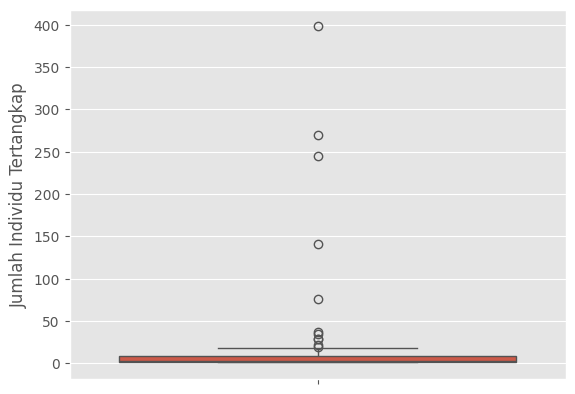

In [36]:
sns.boxplot(df_lengkap['Jumlah Individu Tertangkap'])

In [49]:
print(df_lengkap['Spesies'].value_counts())

Spesies
Oxygaster anomalura             5
Labiobarbus fasciatus           4
Rasbora tornieri                4
Clupeoides borneensis           4
Kryptopterus geminus            4
Rasbora argyrotaenia            4
Rasbora cephalotaenia           3
Osteochilus vittatus            3
Kryptopterus limpok             3
Labiobarbus sabanus             3
Ambassis kopsii                 3
Osteochilus schlegelii          3
Pangasius micronemus            2
Anematichthys armatus           2
Litopenaeus vannamei            2
Cyclocheilichthys enoplos       2
Mystus gulio                    2
Hampala macrolepidota           2
Anabas testudineus              2
Barbonymus schwanenfeldii       2
Kryptopterus micronema          2
Mystus nemurus                  2
Cyclocheilichthys heteronema    2
Pseudeutropius moolenburghae    2
Pangasius polyuranodon          2
Rasbora aurotaenia              2
Macrobrachium rosenbergii       2
Rasbora wilpita                 1
Mystus nigriceps                1
Puntiu

In [50]:
df_lengkap.head()

,Waktu Sampling,Stasiun Sampling,Desa,Latitude,Longitude,Jenis Alat Tangkap,Spesies,Jumlah Individu Tertangkap,Famili,Nama Lokal
0,April s.d. Juli,Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Osteochilus schlegelii,5,Cyprinidae,Seberok
1,April s.d. Juli,Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Labiobarbus fasciatus,16,Cyprinidae,Badas belang/Lambak
2,April s.d. Juli,Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Oxygaster anomalura,21,Xenocyprididae,Terbul/Samis
3,April s.d. Juli,Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Osteochilus vittatus,28,Cyprinidae,Seluang batu/Bowok
4,April s.d. Juli,Stasiun 1 (Sungai Pinang),Sungai Pinang,-3.3515,104.78236,Tangkul,Rasbora cephalotaenia,5,Cyprinidae,Seluang belang/Seluang kureng


In [51]:
df_numeric = df_lengkap.select_dtypes(include=['number'])
df_numeric.head()

,Latitude,Longitude,Jumlah Individu Tertangkap
0,-3.3515,104.78236,5
1,-3.3515,104.78236,16
2,-3.3515,104.78236,21
3,-3.3515,104.78236,28
4,-3.3515,104.78236,5


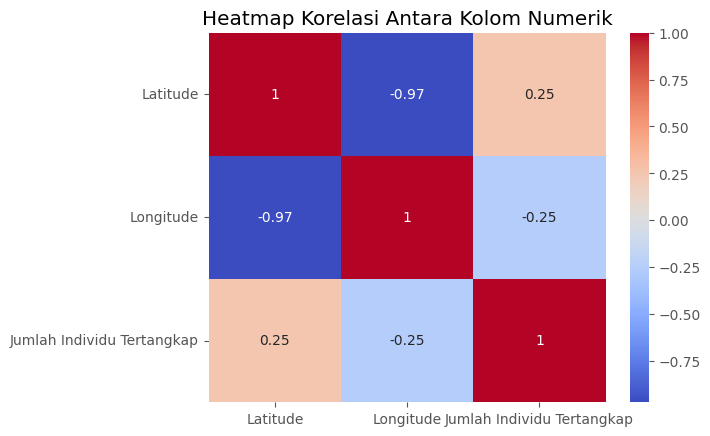

In [52]:
# menghitung dan memvisualisasikan korelasi dengan menggunakan heatmap
corr_matrix = round(df_numeric.corr(), 2) # maksud dari 2 adalah hasil korelasinya sebatas 2 angka di belakang koma

# membuat heatmap
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm") # annot = anotasi = mau menampilkan angka atau tidak, kalau True = menampilkan
                                                        # cmap = color map = memberikan warna yang sesuai selera
plt.title("Heatmap Korelasi Antara Kolom Numerik") # memberi judul grafik
plt.show() # menampilkan grafik

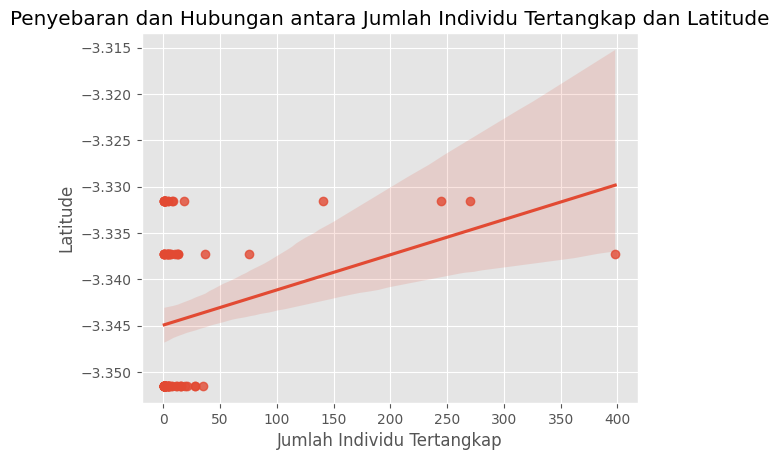

In [53]:
sns.regplot(x="Jumlah Individu Tertangkap", y="Latitude", data = df_lengkap) # regplot = regresiion plot
plt.title("Penyebaran dan Hubungan antara Jumlah Individu Tertangkap dan Latitude")
plt.show()

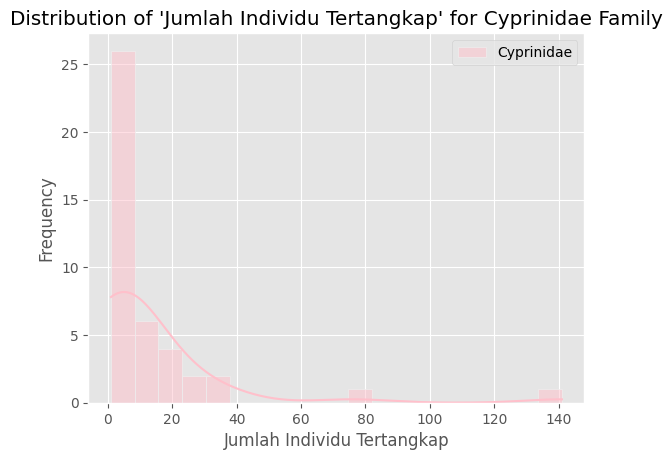

In [56]:
# Filter the DataFrame for the 'Cyprinidae' family
df_cyprinidae = df_lengkap[df_lengkap['Famili'] == 'Cyprinidae']

# Plot the distribution of 'Jumlah Individu Tertangkap' for the Cyprinidae family
sns.histplot(df_cyprinidae["Jumlah Individu Tertangkap"], kde=True, label = "Cyprinidae", color = "pink")
plt.title("Distribution of 'Jumlah Individu Tertangkap' for Cyprinidae Family")
plt.xlabel("Jumlah Individu Tertangkap")
plt.ylabel("Frequency")
plt.legend()
plt.show()

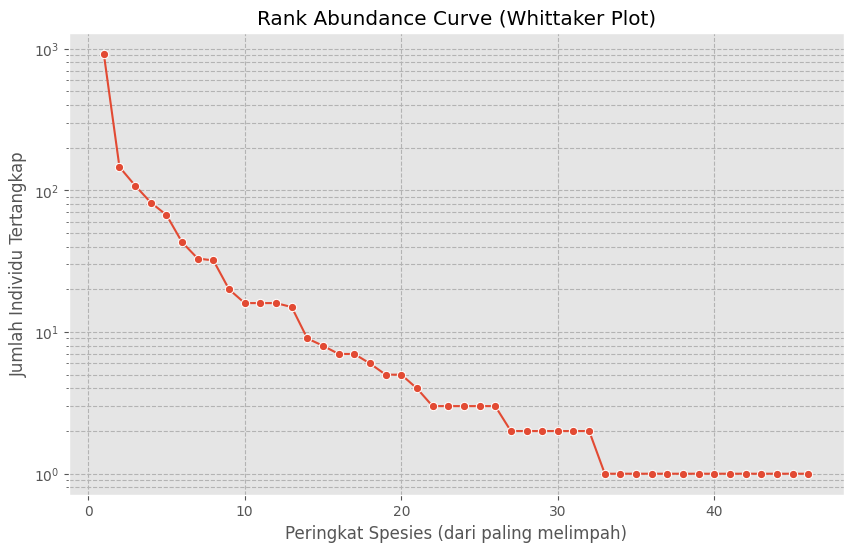

In [59]:
# Agregasi jumlah individu per spesies
species_counts = df_lengkap.groupby('Spesies')['Jumlah Individu Tertangkap'].sum().sort_values(ascending=False)

# Buat rank (peringkat)
species_counts_ranked = species_counts.reset_index()
species_counts_ranked['Rank'] = species_counts_ranked.index + 1

plt.figure(figsize=(10, 6))
sns.lineplot(x='Rank', y='Jumlah Individu Tertangkap', data=species_counts_ranked, marker='o')
plt.title('Rank Abundance Curve (Whittaker Plot)')
plt.xlabel('Peringkat Spesies (dari paling melimpah)')
plt.ylabel('Jumlah Individu Tertangkap')
plt.yscale('log') # Seringkali sumbu Y di-log untuk data kelimpahan
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()

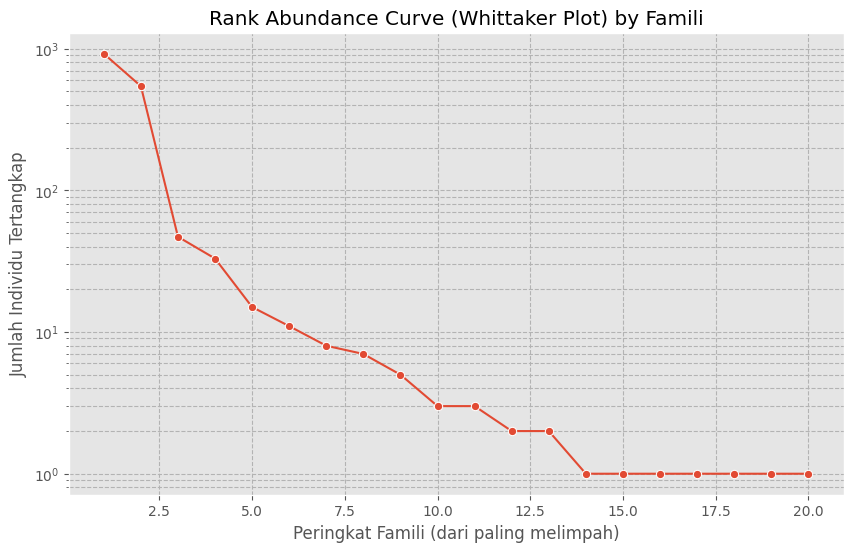

In [60]:
# Agregasi jumlah individu per famili
famili_counts_individuals = df_lengkap.groupby('Famili')['Jumlah Individu Tertangkap'].sum().sort_values(ascending=False)

# Buat rank (peringkat)
famili_counts_individuals_ranked = famili_counts_individuals.reset_index()
famili_counts_individuals_ranked['Rank'] = famili_counts_individuals_ranked.index + 1

plt.figure(figsize=(10, 6))
sns.lineplot(x='Rank', y='Jumlah Individu Tertangkap', data=famili_counts_individuals_ranked, marker='o')
plt.title('Rank Abundance Curve (Whittaker Plot) by Famili')
plt.xlabel('Peringkat Famili (dari paling melimpah)')
plt.ylabel('Jumlah Individu Tertangkap')
plt.yscale('log') # Seringkali sumbu Y di-log untuk data kelimpahan
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()

In [ ]:
print(df_lengkap['Famili'].value_counts())

Famili
Cyprinidae         42
Siluridae           9
Xenocyprididae      5
Bagridae            5
Ambassidae          4
Clupeidae           4
Pangasiidae         4
Penaeidae           3
Anabantidae         2
Schilbeidae         2
Palaemonidae        2
Osphronemidae       2
Clariidae           1
Helostomatidae      1
Polynemidae         1
Pristolepididae     1
Botiidae            1
Channidae           1
Loricariidae        1
Nemacheilidae       1
Name: count, dtype: int64


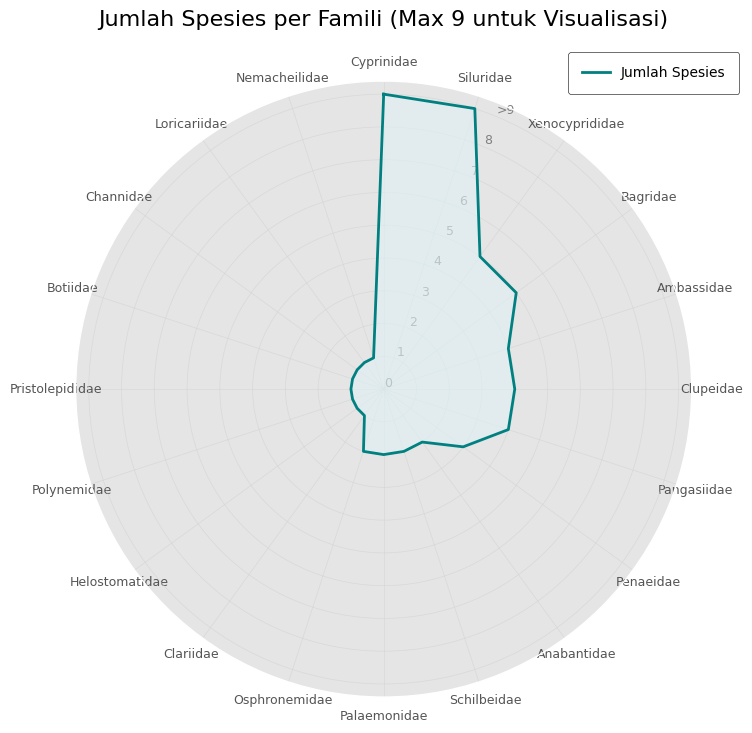

In [61]:
# Data famili_species_count yang Anda berikan
famili_species_count = pd.Series({
    'Cyprinidae': 42,
    'Siluridae': 9,
    'Xenocyprididae': 5,
    'Bagridae': 5,
    'Ambassidae': 4,
    'Clupeidae': 4,
    'Pangasiidae': 4,
    'Penaeidae': 3,
    'Anabantidae': 2,
    'Schilbeidae': 2,
    'Palaemonidae': 2,
    'Osphronemidae': 2,
    'Clariidae': 1,
    'Helostomatidae': 1,
    'Polynemidae': 1,
    'Pristolepididae': 1,
    'Botiidae': 1,
    'Channidae': 1,
    'Loricariidae': 1,
    'Nemacheilidae': 1
}).sort_values(ascending=False) # Urutkan dari terbesar ke terkecil

# --- 1. Persiapan Data dengan Capping ---
# Tentukan batas atas (misal, 10 atau 9 sesuai contoh Anda)
max_display_value = 9 # Semua nilai di atas 9 akan dianggap 9

# Buat nilai yang di-cap untuk plotting
# Jika nilai > max_display_value, jadikan max_display_value
# Jika tidak, gunakan nilai aslinya
values_capped = famili_species_count.apply(lambda x: min(x, max_display_value)).tolist()

# Labels tetap sama
labels = famili_species_count.index.tolist()

# Tambahkan nilai pertama di akhir agar plot "tertutup"
values_capped_closed = values_capped + values_capped[:1]
labels_closed = labels + labels[:1]

# Hitung sudut untuk setiap sumbu
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles_closed = angles + angles[:1] # Sudut juga harus ditutup

# --- 2. Buat Radar Chart ---
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Warna dan gaya plot
line_color = '#008080'  # Teal gelap
fill_color = '#E0F2F7'  # Biru muda (sangat terang) atau lightgrey
grid_color = '#E0E0E0'  # Abu-abu terang untuk grid

# Plot garis utama
ax.plot(angles_closed, values_capped_closed, color=line_color, linewidth=2, label='Jumlah Spesies')
ax.fill(angles_closed, values_capped_closed, color=fill_color, alpha=0.6) # Isi area

# --- 3. Kustomisasi Tampilan ---
# Rotasi plot agar sumbu pertama di posisi kanan (atau sesuaikan)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Label sumbu radial (nama famili)
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=9)

# Label sumbu Y (nilai jumlah spesies)
# Karena kita sudah cap, max_display_value + 1 (misal 10) adalah batas atas yang bagus
yticks_val = np.arange(0, max_display_value + 1, 1) # Range 0 sampai max_display_value, interval 1
ax.set_yticks(yticks_val)

# Custom YtickLabels untuk menunjukkan nilai yang di-cap
yticklabels = [f'{int(y)}' for y in yticks_val]
# Ubah label terakhir menjadi ">N" jika N adalah max_display_value
if max_display_value in yticks_val: # Pastikan max_display_value ada di yticks_val
    yticklabels[-1] = f'>{max_display_value}' # Ini akan jadi '>10' jika max_display_value 10

ax.set_yticklabels(yticklabels, color="gray", size=9)
ax.tick_params(axis='y', pad=15) # Menggeser label Y axis

# Grid
ax.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
ax.set_axisbelow(True)

# Judul
ax.set_title(f'Jumlah Spesies per Famili (Max {max_display_value} untuk Visualisasi)', pad=40, fontsize=16)

# Legenda
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.07), frameon=True, edgecolor='black', facecolor='white', borderpad=1, borderaxespad=1)

plt.show()

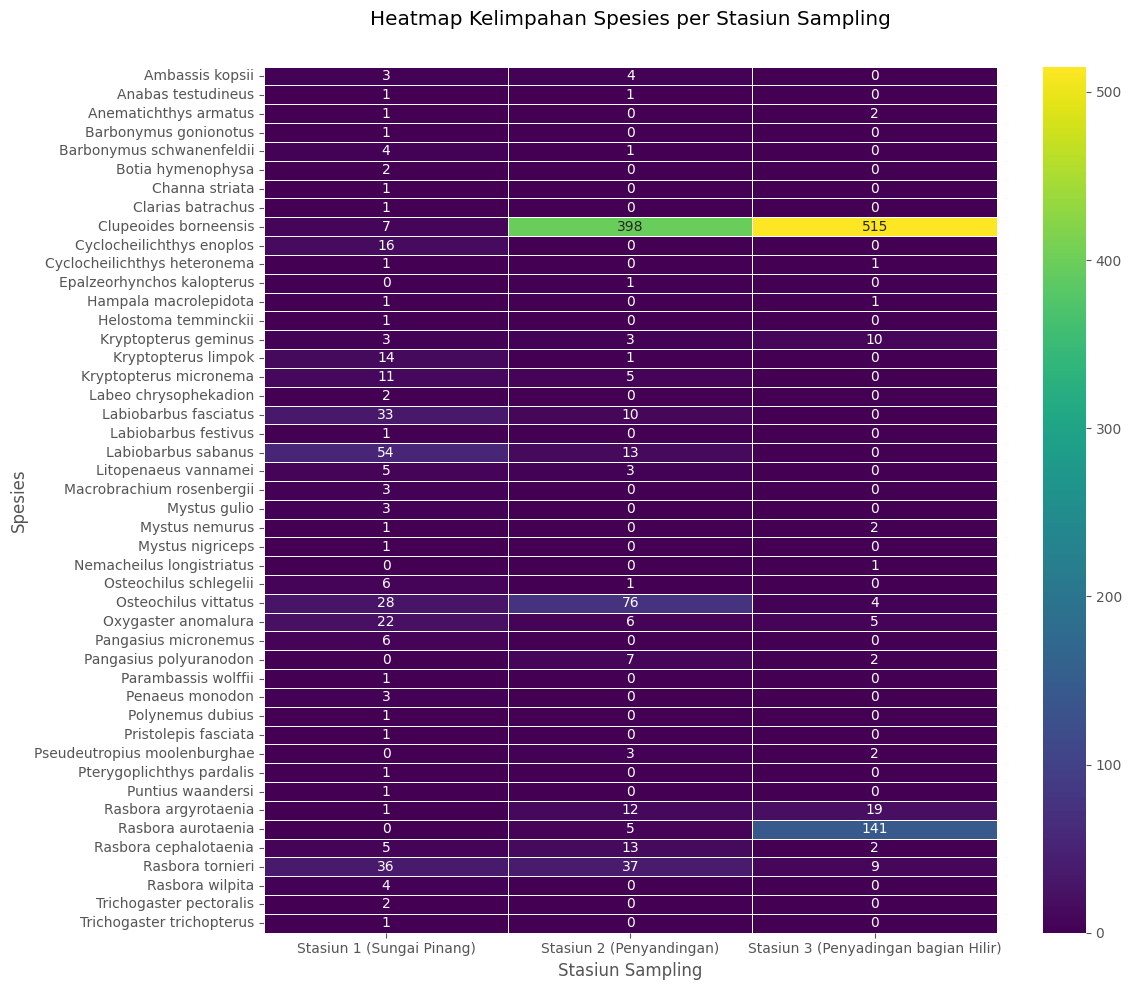

In [62]:
# Buat pivot table: baris = spesies, kolom = stasiun, nilai = jumlah individu
species_location_pivot = df_lengkap.pivot_table(
    index='Spesies',
    columns='Stasiun Sampling',
    values='Jumlah Individu Tertangkap',
    aggfunc='sum'
).fillna(0) # Isi NaN dengan 0 jika spesies tidak ditemukan di stasiun tertentu

plt.figure(figsize=(12, 10))
sns.heatmap(species_location_pivot, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap Kelimpahan Spesies per Stasiun Sampling', pad=30)
plt.xlabel('Stasiun Sampling')
plt.ylabel('Spesies')
plt.tight_layout()
plt.show()

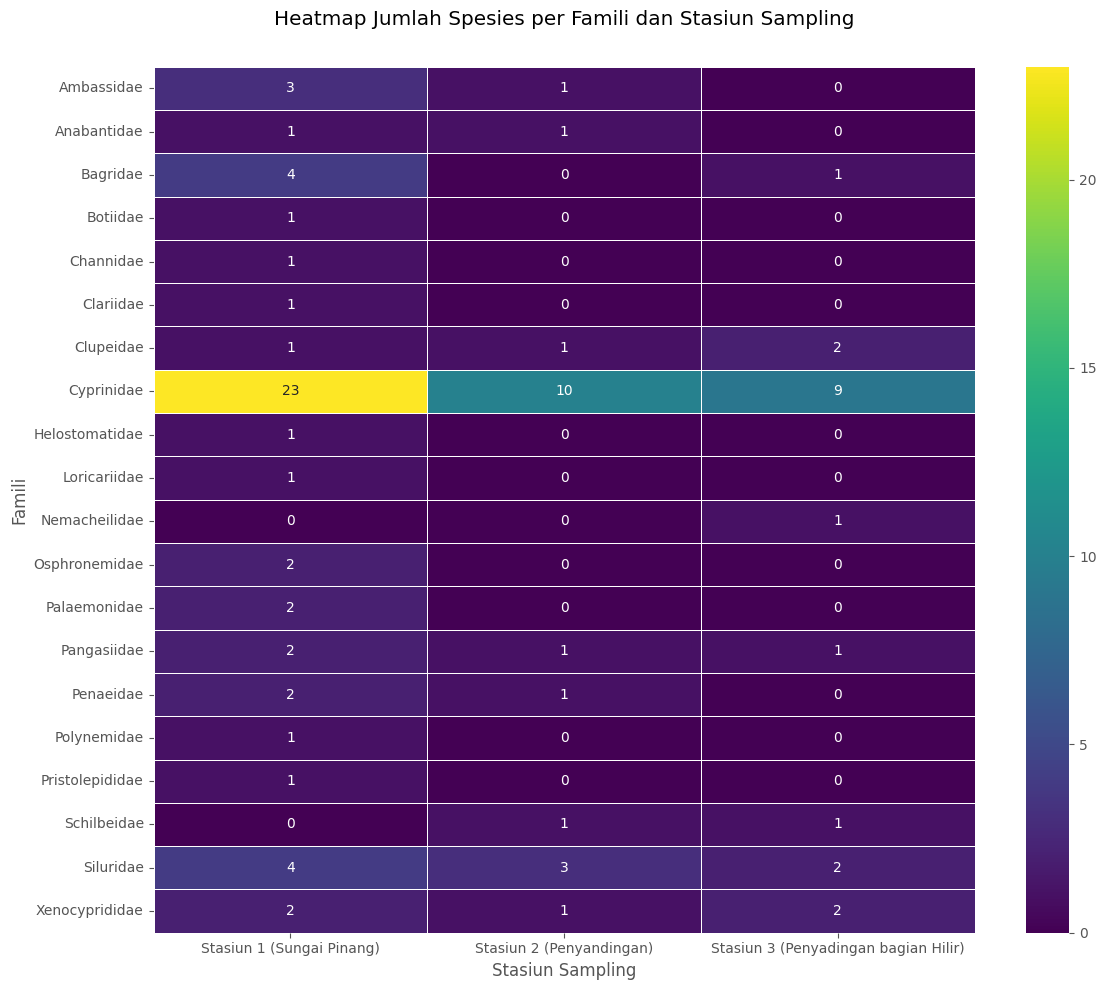

In [64]:
# Buat pivot table: baris = famili, kolom = stasiun, nilai = jumlah spesies
famili_location_pivot = df_lengkap.pivot_table(
    index='Famili',
    columns='Stasiun Sampling',
    values='Spesies',
    aggfunc='count' # Changed aggfunc to 'count'
).fillna(0) # Isi NaN dengan 0 jika famili tidak ditemukan di stasiun tertentu

plt.figure(figsize=(12, 10))
sns.heatmap(famili_location_pivot, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap Jumlah Spesies per Famili dan Stasiun Sampling', pad=30) # Changed title
plt.xlabel('Stasiun Sampling')
plt.ylabel('Famili')
plt.tight_layout()
plt.show()